## Comparison to BLAST

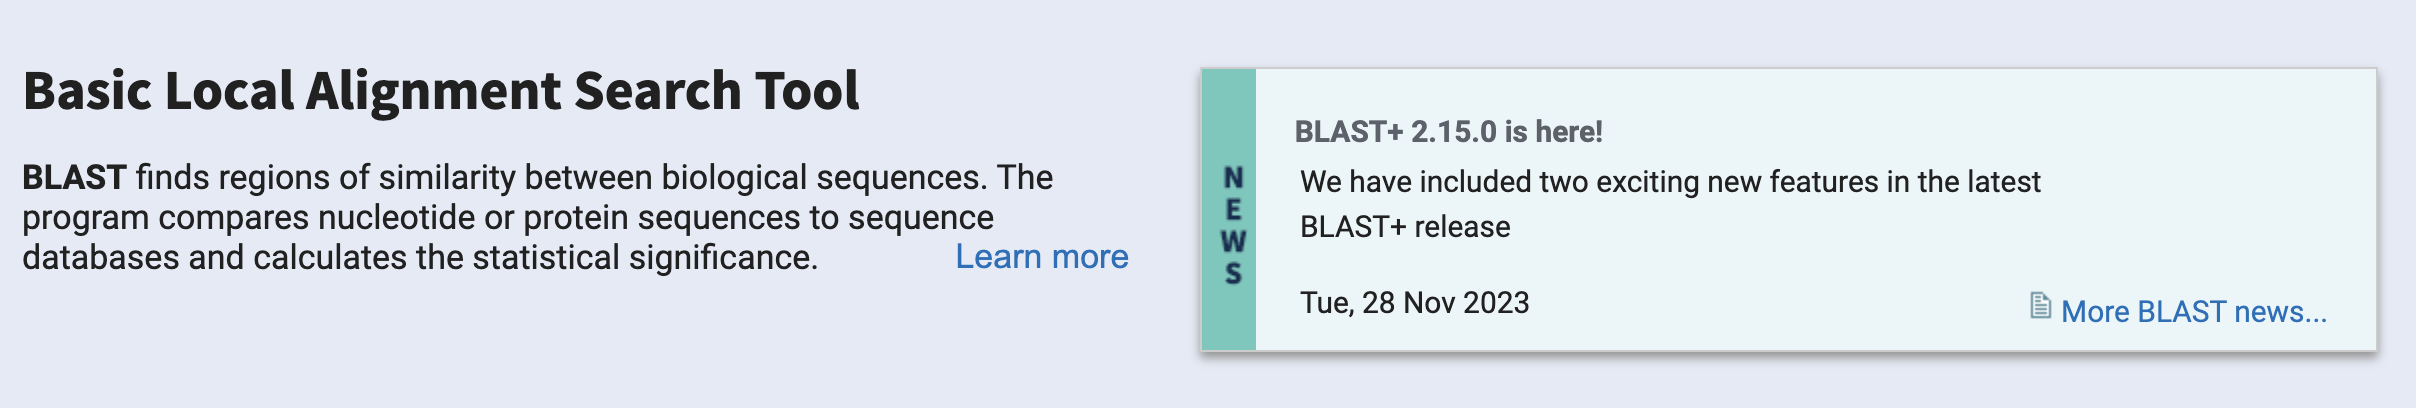

#### Install Blast tools

* https://blast.ncbi.nlm.nih.gov/doc/blast-help/downloadblastdata.html
* https://www.ncbi.nlm.nih.gov/books/NBK279690/

#### Compare our prediction with BLAST Tools

In [1]:
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import json
from tqdm import tqdm
import sklearn.metrics as metrics
from BLAST.utils import metric

In [2]:
df = pd.read_csv('./BLAST/src/testset.csv')

In [3]:
df.head()

id  \
0          Thhalv10001938m -- EIL   
1                Tp1g37880 -- EIL   
2              Pbr004574.1 -- EIL   
3  Sme2.5_02278.1_g00005.1 -- EIL   
4          ONIVA11G15950.1 -- EIL   

                                            sequence  length class  
0  MMMFNEMGMYGKMDFFSSTSLGEIDVCPLPQAEQDHPVVEEDYTDD...     582   EIL  
1  MGVFFSDPDSIAEDDGYTDNELDVDELEKRIWKQEMRLRRLKEHRK...     211   EIL  
2  MGDVGEIGPDISSDIEEDLRCDNIAEKDVSDEEIEAEDLERRMWKD...     608   EIL  
3  MNNEVVEENQEFDDEEINYDDLKRRMWKDRMRMQILKGKKRDMMIE...     494   EIL  
4  MDASKKSVMTKEEQQLSPAASPAAAVMTAEADAINEEQDKAAAATT...     466   EIL

In [4]:
records = []
for i, row in df.iterrows():
    record = SeqRecord(Seq(row['sequence']), id=str(i+1), description=" | " + row['class'])
    records.append(record)

# Save to a FASTA file
output_file = "./BLAST/testset.fasta"
SeqIO.write(records, output_file, "fasta")

print(f"FASTA file saved as {output_file}")

FASTA file saved as ./BLAST/testset.fasta


#### Build reference(train) database for blast

In [5]:
ref_pah = "../data/mix_data/trainset"

In [6]:
gene_info_path = "../data/gene_info.json"
with open(gene_info_path, 'r') as json_file:
    gene_info = json.load(json_file)

In [7]:
records = []
for gene, info in tqdm(gene_info.items()):
    path = f"{ref_pah}/{info['file_code']}.csv"
    df_gene = pd.read_csv(path)
    df_gene = df_gene[df_gene['class'] == 1]
    
    # write
    for _, row in df_gene.iterrows():
        record = SeqRecord(Seq(row['sequence']), id=row['id'] + "--" + gene, description="")
        records.append(record)

# Save to a FASTA file
output_file = "./BLAST/trainset.fasta"
SeqIO.write(records, output_file, "fasta")
print(f"FASTA file saved as {output_file}")

100%|███████████████████████████████████████████| 58/58 [00:06<00:00,  9.05it/s]


FASTA file saved as ./BLAST/trainset.fasta


In [15]:
import sys, os
current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.append(root_directory)

from processing.fasta import read as fasta_read
x=fasta_read("./BLAST/trainset.fasta", family=1)
x

id  \
0       GSMUA_AchrUn_randomP23040_001--AP2   
1                          KHN36319.1--AP2   
2                           678453786--AP2   
3                     OBART06G22270.1--AP2   
4                       MA_30905g0010--AP2   
...                                    ...   
256274                XP_010522314.1--bZIP   
256275             Sp_092640_iogy.t2--bZIP   
256276               Vradi06g16770.1--bZIP   
256277            Gorai.009G212600.2--bZIP   
256278          Glyma.18G020900.12.p--bZIP   

                                                 sequence  length  class  
0       MNMNASDNWLDFSLSQQRCLLEAFSDAPHHHGLSLSLSLSTNAATE...     469      1  
1       MNIGVPSHLHQTQPSSAAVEAVPPNFYHHTPLHNYGLYYELEGEHV...     548      1  
2       MGSSQEHQSWLDFSLTNNNHLSFSSQSTCAAAAPVGGYHHRFSNLE...     315      1  
3       MAATFYGVGSIALAMHEDDEEEGSGRVFGFAAGDLVRPAVVTQQLF...     424      1  
4       MGCHVQILVAGENNNLKAGEESSASLKSEAAAKNGSSLSQPKTKRA...     420      1  
...                                                   ...     ...    ...  
256274  MEPNDRPSHCFNLMEGNPSQNNHFNSLFLPTNTESHVQLHSVSPNT...     187      1  
256275  MMEDNNQIKCNNNNSSNRNRVPLMDDGELEFSNQELLSSANIGEIP...     290      1  
256276  MEGVDQSNMKRNGSVFGSSSGANLRPPNRLNTAVPVSQLGVAENQK...     553      1  
256277  MGTNMNFGSNPPPSGDGGGNKPPGNNLLTRQPSIYSLTFDEFQSTM...     424      1  
256278  MNSASPQFVSSRRMSVYDPIHQISMWGEGFKSNGNLSAAMPLIDET...     363      1  

[256279 rows x 4 columns]

In [16]:
x.shape

(256279, 4)

#### BUILD DATABASE FOR BLAST

In [8]:
!makeblastdb -in ./BLAST/trainset.fasta -dbtype prot -out ./BLAST/database/pygenomics_ref_db



Building a new DB, current time: 07/07/2024 09:42:23
New DB name:   /Users/genereux/Documents/UM6P/COURS-S2/S2-PROJECT/pygenomics/test/BLAST/database/pygenomics_ref_db
New DB title:  ./BLAST/trainset.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /Users/genereux/Documents/UM6P/COURS-S2/S2-PROJECT/pygenomics/test/BLAST/database/pygenomics_ref_db
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 256279 sequences in 4.78068 seconds.




#### RUN BLAST SEARCH TOOL

In [16]:
#!blastp -query ./BLAST/testset.fasta -db ./BLAST/database/pygenomics_ref_db -out ./BLAST/blast_result.txt -outfmt 6 -evalue 1e-5 -num_threads 112

#### View Blast Analysis results

In [ ]:
columns = [
    "query_id", "subject_id", "perc_identity", "alignment_length",
    "mismatches", "gap_opens", "q_start", "q_end", "s_start", "s_end",
    "evalue", "bit_score"
]
blast_results = pd.read_csv("./BLAST/blast_result.txt", sep="\t", names=columns)
#blast_results.to_csv("./BLAST/blast_results.csv", index=False)

# Display the first few rows of the DataFrame
blast_results

In [35]:
blast_results

query_id                subject_id  perc_identity  alignment_length  \
0                1            676714038--EIL         89.696               592   
1                1       XP_013629559.1--EIL         84.628               592   
2                1  GSBRNA2T00066199001--EIL         83.277               592   
3                1       XP_009133914.1--EIL         85.135               592   
4                1       XP_009133916.1--EIL         85.135               592   
...            ...                       ...            ...               ...   
33292778     64091     XP_015882438.1--NF-YA         40.670               209   
33292779     64091        Pbr037486.1--NF-YA         43.787               169   
33292780     64091   Pp3c7_7470V3.2.p--NF-YA         46.795               156   
33292781     64091   Pp3c7_7470V3.3.p--NF-YA         46.795               156   
33292782     64091   Pp3c7_7470V3.1.p--NF-YA         46.795               156   

          mismatches  gap_opens  q_start  q_end  s_start  s_end        evalue  \
0                 49          6        1    581        1    591  0.000000e+00   
1                 59         10        1    581        1    571  0.000000e+00   
2                 59         10        1    581        1    563  0.000000e+00   
3                 56         10        1    581        1    571  0.000000e+00   
4                 56         10        1    581        1    571  0.000000e+00   
...              ...        ...      ...    ...      ...    ...           ...   
33292778         105          6       65    260        3    205  3.220000e-35   
33292779          79          2      112    270       45    207  3.300000e-35   
33292780          75          4      121    269       94    248  3.410000e-35   
33292781          75          4      121    269       94    248  3.410000e-35   
33292782          75          4      121    269       94    248  3.410000e-35   

          bit_score  
0            1063.0  
1            1001.0  
2             980.0  
3             977.0  
4             977.0  
...             ...  
33292778      127.0  
33292779      127.0  
33292780      130.0  
33292781      130.0  
33292782      130.0  

[33292783 rows x 12 columns]

#### Proccessing to make final inference base on threshold

In [19]:
voting_threshold = 50
unique_query_ids = sorted(blast_results['query_id'].unique())

predictions = ["Unknown"  for _ in range(len(df))]
for query_id in tqdm(unique_query_ids, desc="Max Voting : "):
    filtered_df = blast_results[blast_results['query_id'] == query_id]
    
    # Find the row with the highest perc_identity greater than voting_threshold
    best_match = filtered_df[filtered_df['perc_identity'] > voting_threshold].sort_values(by='perc_identity', ascending=False).head(1)
    if not best_match.empty:
        subject_id = best_match.iloc[0]['subject_id']
        subject_id_part = subject_id.split('--')[-1]
        predictions[query_id-1] = (subject_id_part)

blast_prediction = pd.DataFrame({'prediction': predictions})

Max Voting : 100%|████████████████████████| 64037/64037 [15:59<00:00, 66.74it/s]


In [20]:
with open("./BLAST/src/class_mapping.json", 'r') as json_file:
    class_mapping = json.load(json_file)
true_label = pd.read_csv("./BLAST/src/true_labels.csv")

In [21]:
blast_prediction["predicted_label"] = blast_prediction.prediction.map(class_mapping)
blast_prediction.head()

prediction  predicted_label
0        EIL                1
1        EIL                1
2        EIL                1
3        EIL                1
4        EIL                1

#### Display performance

In [33]:
metric.show_metrics(true_label, blast_prediction.predicted_label)

In [31]:
import importlib
importlib.reload(metric)

<module 'BLAST.utils.metric' from '/Users/genereux/Documents/UM6P/COURS-S2/S2-PROJECT/pygenomics/test/BLAST/utils/metric.py'>


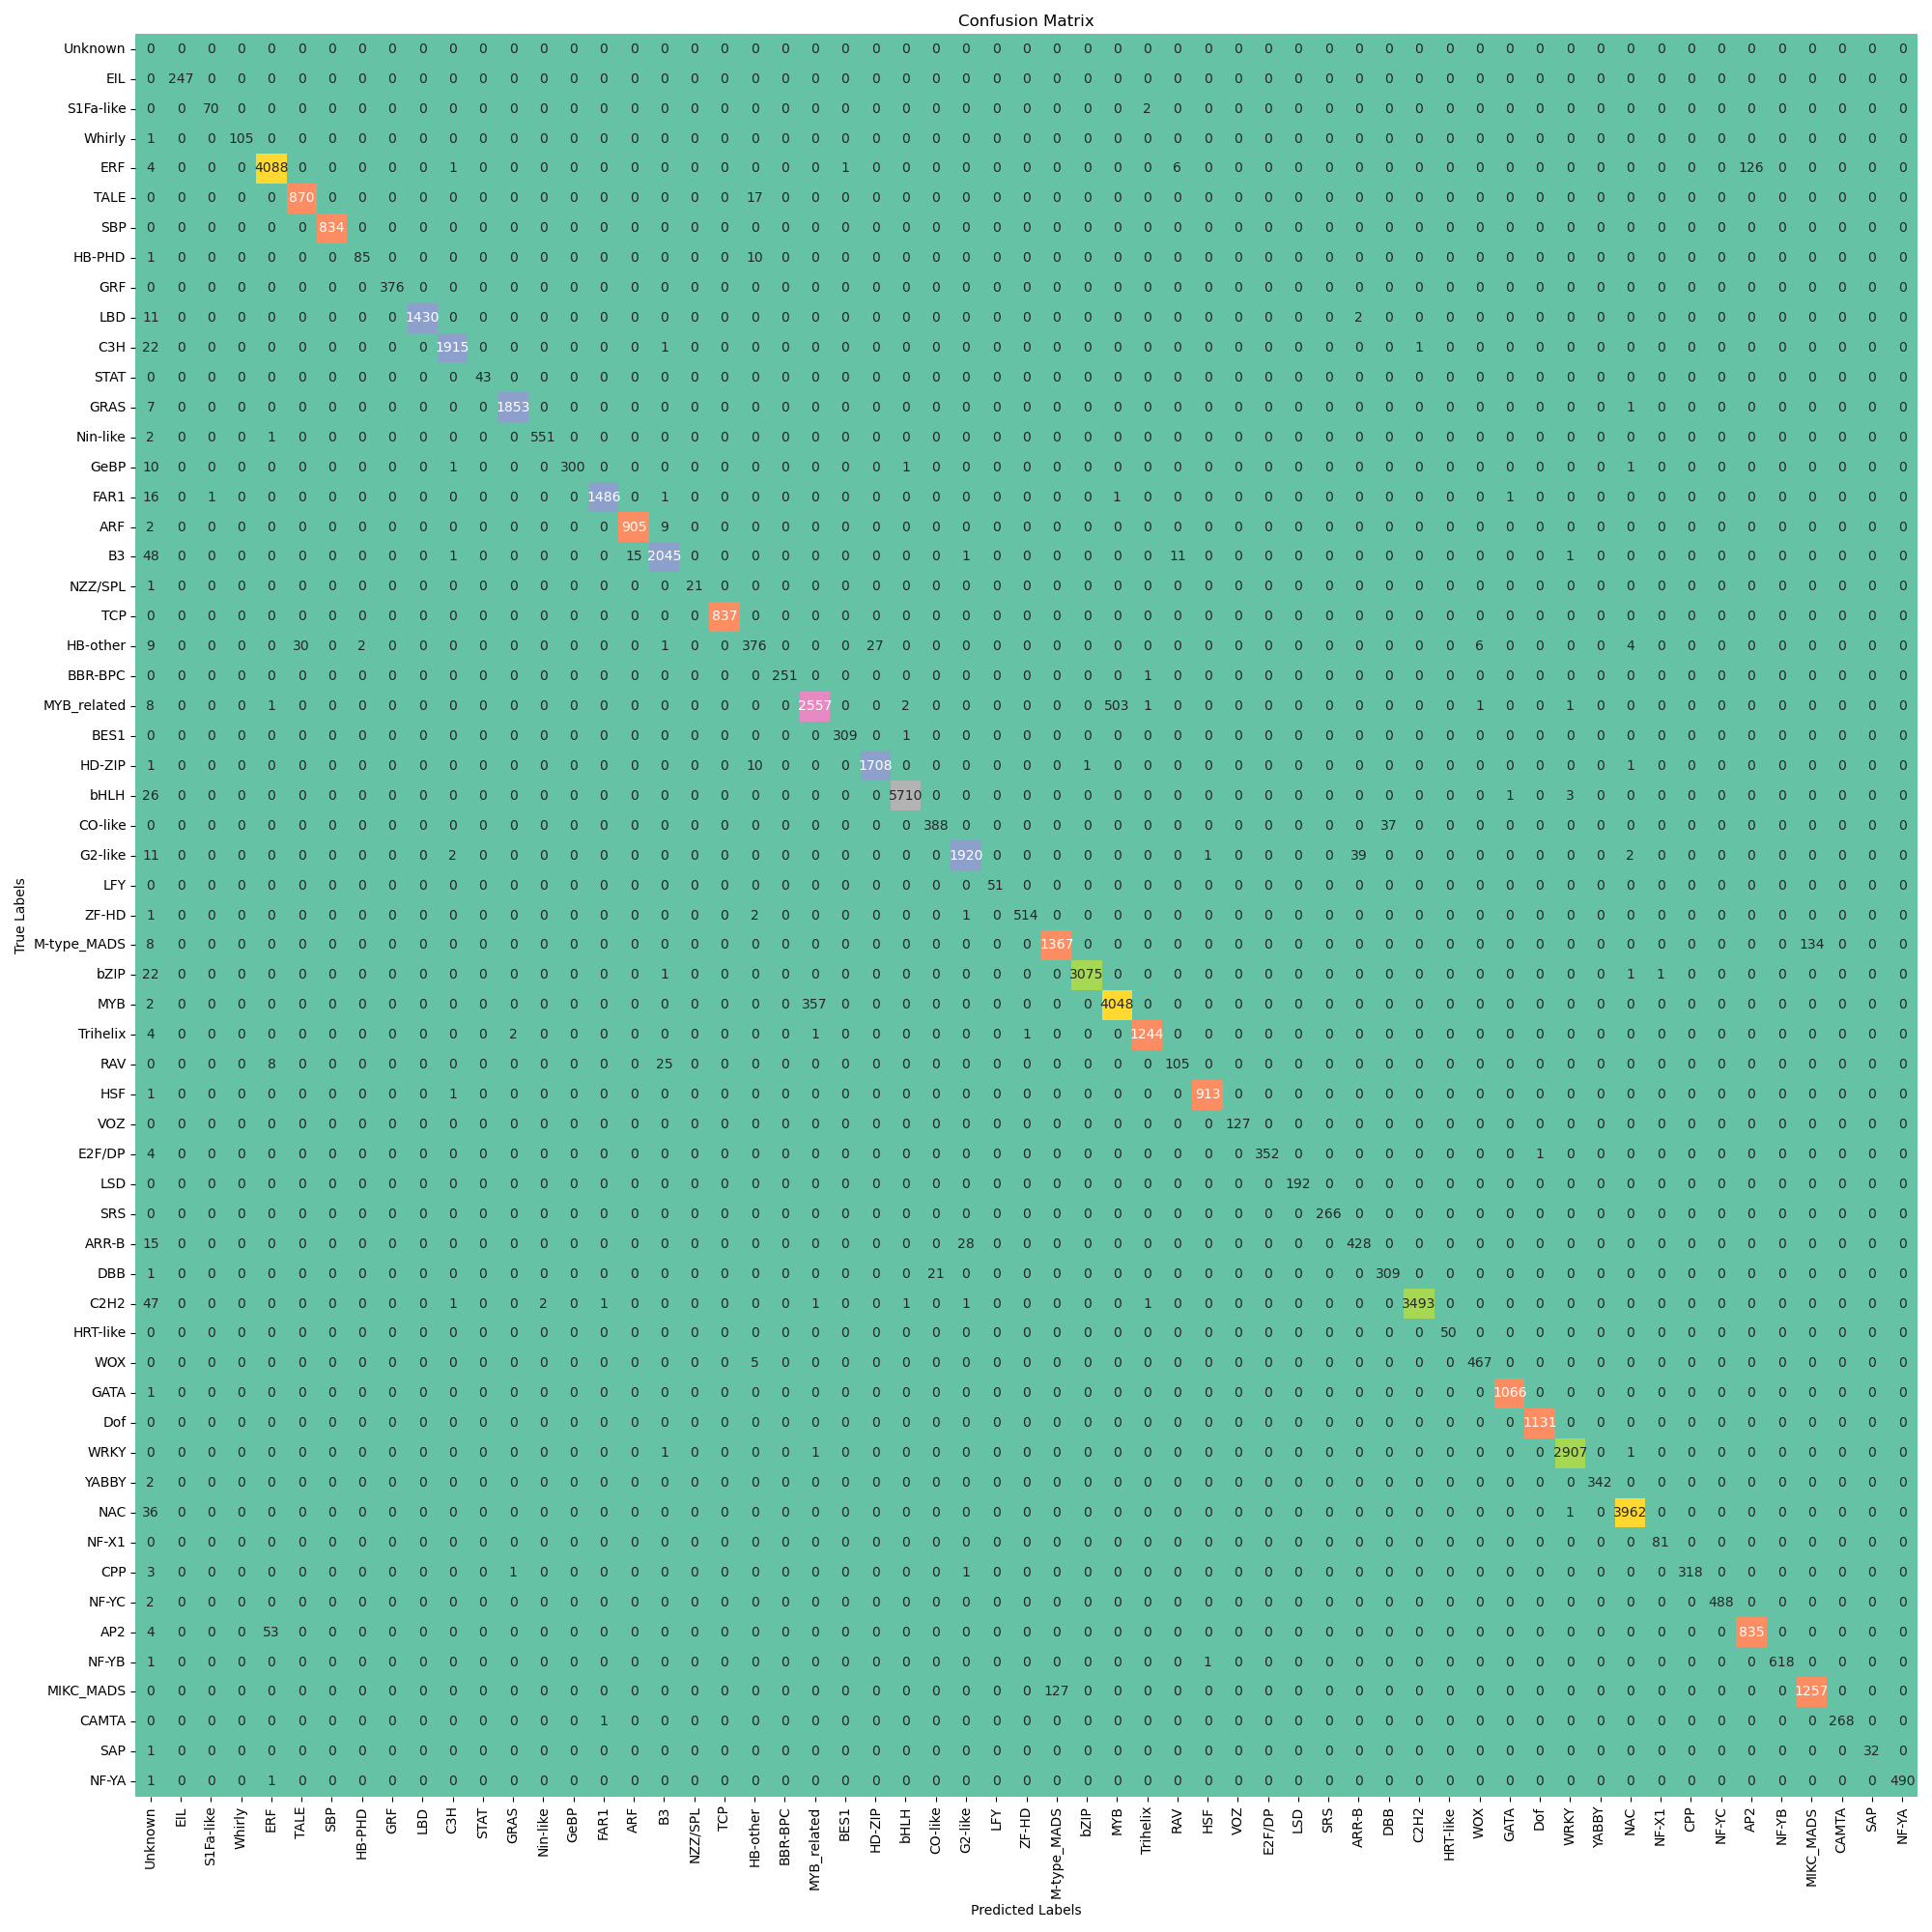

In [32]:
metric.show_confusion(true_label, blast_prediction.predicted_label, class_mapping)